    hour zipcode  count
0     18   35244     68
1     18   35209     67
2     18   35233     50
3     18   35007     42
4     18   35235     38
..   ...     ...    ...
78    18   36202      1
79    18   75243      1
80    18   35111      1
81    18   35094      1
82    18   35061      1

[83 rows x 3 columns]


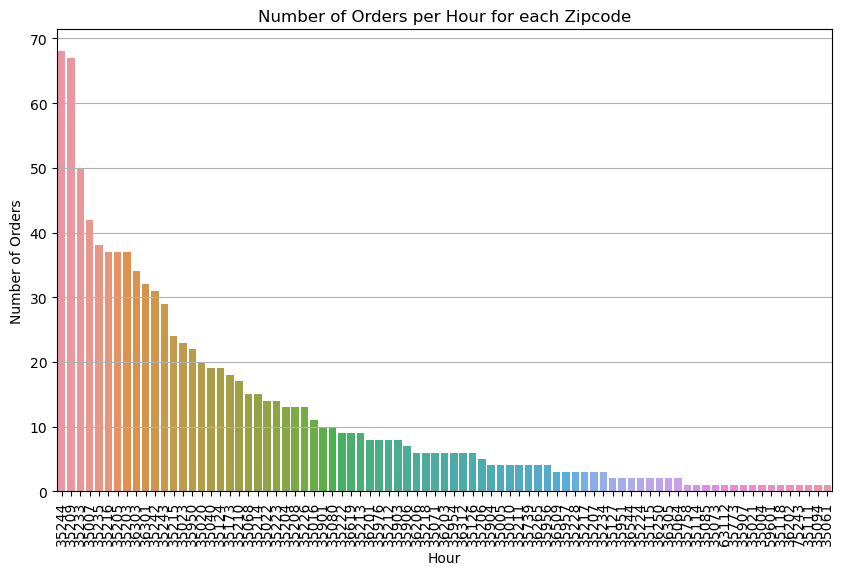

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, hour
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize Spark session
spark = SparkSession.builder \
    .appName("OrdersPerHourByZip") \
    .getOrCreate()

# Load CSV data into DataFrame
csv_file = "C:\Chintan\practice\orders_data.csv"  # Replace with the actual file path
df = spark.read.csv(csv_file, header=True)

# Parse scan_date column to extract hour
df = df.withColumn("hour", hour("scan_date"))

# Group by hour and zipcode and count orders
orders_per_hour_zip = df.groupBy("hour", "zipcode").count()

# Sort by count in descending order
orders_per_zipcode_hour = orders_per_hour_zip.orderBy(col("count").desc())

# Show the result
# orders_per_zipcode_hour.show()


filtered_df = orders_per_zipcode_hour.filter(F.col("zipcode").cast("int").isNotNull())
# Convert Spark DataFrame to Pandas DataFrame for plotting
orders_per_zipcode_hour_pd = filtered_df.toPandas()

print(orders_per_zipcode_hour_pd)
# Filter data for a specific zipcode

# Plot
plt.figure(figsize=(10, 6))
# plt.bar(orders_per_zipcode_hour_pd["zipcode"], orders_per_zipcode_hour_pd["count"])
sns.barplot(x="zipcode", y="count", data=orders_per_zipcode_hour_pd)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Hour for each Zipcode")
plt.xticks(rotation= 90)
plt.grid(axis="y")
plt.show()



     hour                            city  count
0      18                      Birmingham    376
1      18                          Hoover     80
2      18                          Dothan     69
3      18                       Alabaster     41
4      18                        Bessemer     39
..    ...                             ...    ...
108    18                4689 Pinson Blvd      1
109    18                             nan      1
110    18                         McCalla      1
111    18  3083 Montgomery Highway Dothan      1
112    18                      Forestdale      1

[113 rows x 3 columns]


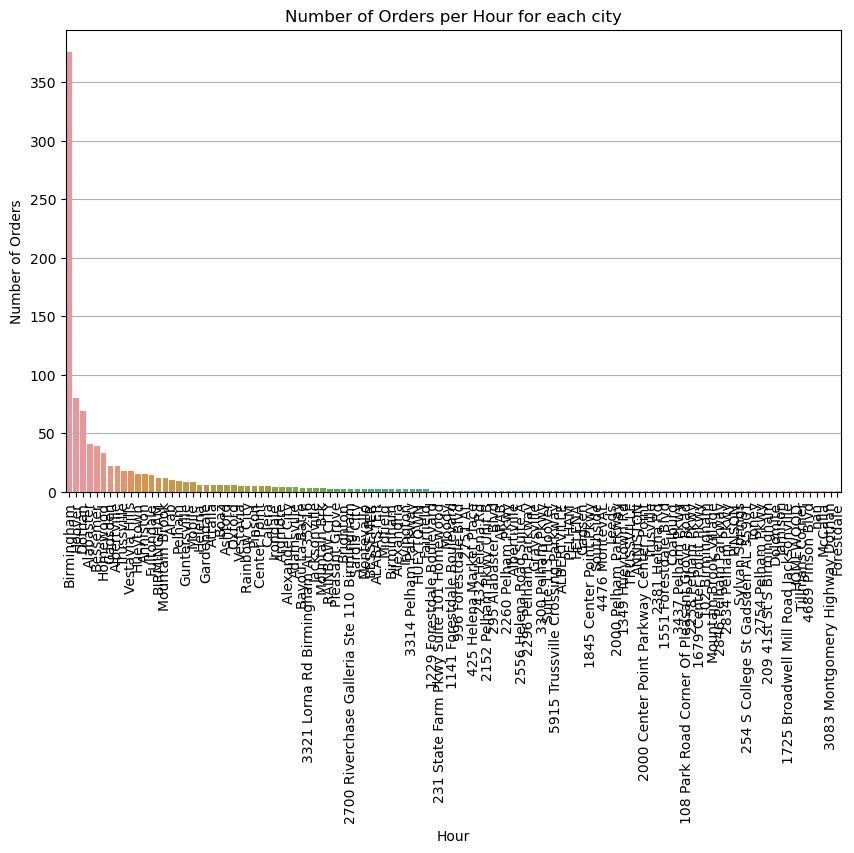

In [41]:
# Group by hour and city and count orders
orders_per_hour_city = df.groupBy("hour", "city").count()

# Sort by count in descending order
orders_per_city_hour = orders_per_hour_city.orderBy(col("count").desc())

# Convert Spark DataFrame to Pandas DataFrame for plotting
orders_per_city_hour_pd = orders_per_city_hour.toPandas()

print(orders_per_city_hour_pd)
# Filter data for a specific zipcode

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="city", y="count", data=orders_per_city_hour_pd)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Hour for each city")
plt.xticks( rotation= 90)
plt.grid(axis="y")
plt.show()


# Stop Spark session
spark.stop()
